# ME5204 Finite Element Analysis
## Assignment Best Approximation
### SENTHILKUMAR R (ME22M016)

Best approximation:

$$f(x) - Actual function/ Function to be approximated$$

$$f^h(x) - Approximated function$$

$$b_i - Basis$$

$$\int_{\Omega} (f(x)-f^h(x))b_i \,d\Omega$$ 

$$\displaystyle\sum_{j}^n K_{ij} C_j= F_i$$ n_max : is the max. number of dimension

$$K_{ij} = \int_{\Omega} b_i b_j \,d\Omega,$$, $$F_i = \int_{\Omega} f(x)b_i\,d\Omega$$

In [1]:
#Flow
## Input n
## Define the function to be approximate
## Define the polynomial function
## Define the Basis
## Evaluate the integrals and find K & F matrix
## Form the matrix Kc = F and solve for c

In [2]:
import math
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

### Function to be approximated and their limits

In [3]:
# Define the function to approximate
def f(x):
  return np.sin(x) / x

In [4]:
# Define lower and upper limits
lowerlim = 0.01
upperlim = 6*np.pi

### Enter the Max. Dimension of basis 

In [5]:
n_max = int(input("Enter max. dimension n : "))

Enter max. dimension n : 12


### Evaluate $K_{ij}$ Matrix &  $F_i$ Vector and solve for $u_i$

In [6]:
K_ij_term = lambda i, j: lambda x: x**(i + j)

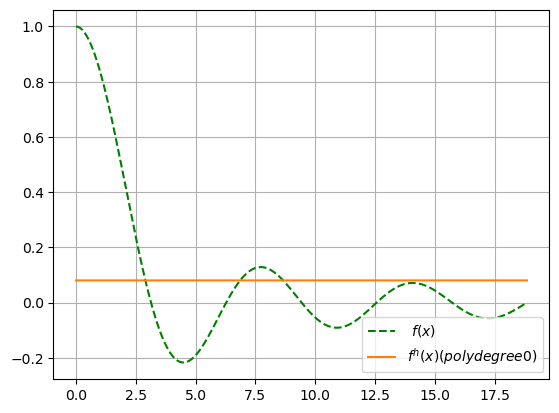

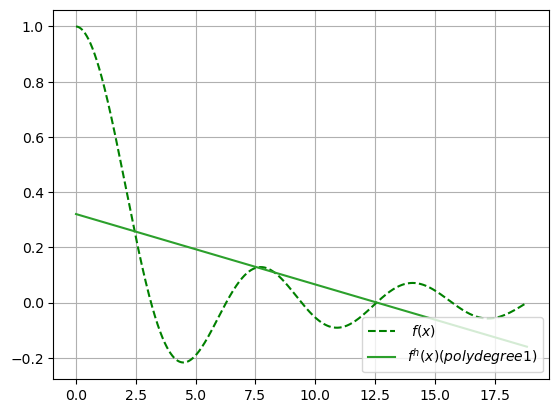

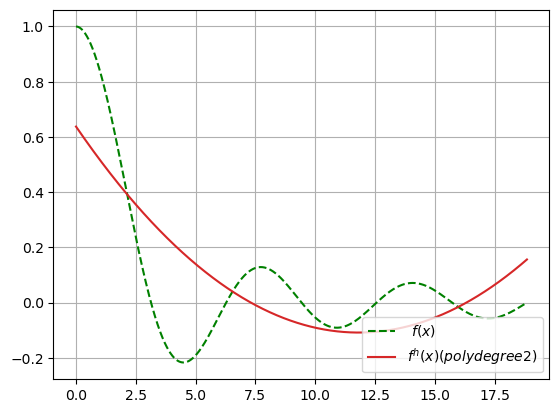

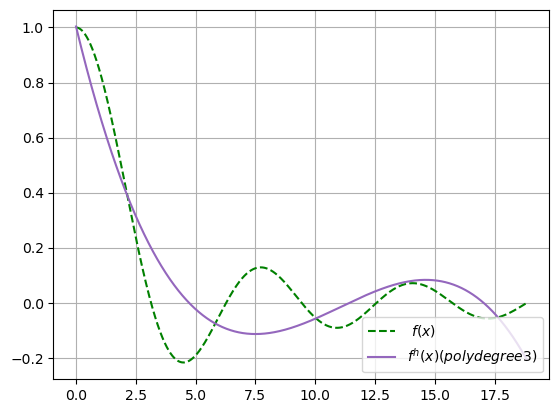

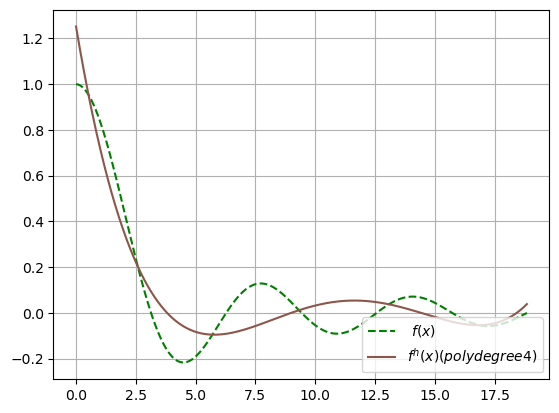

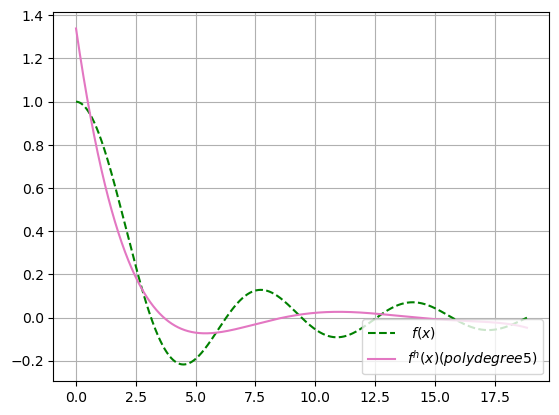

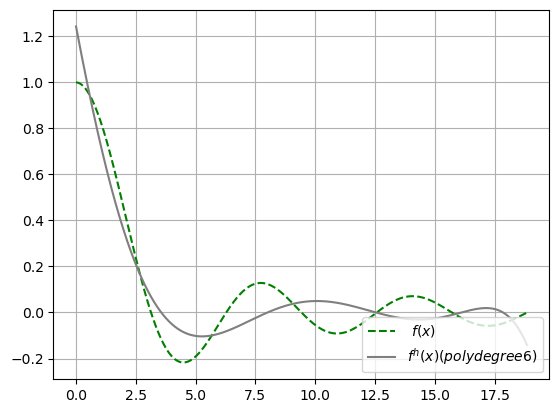

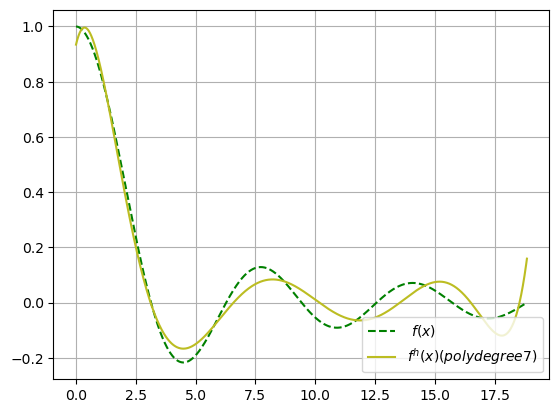

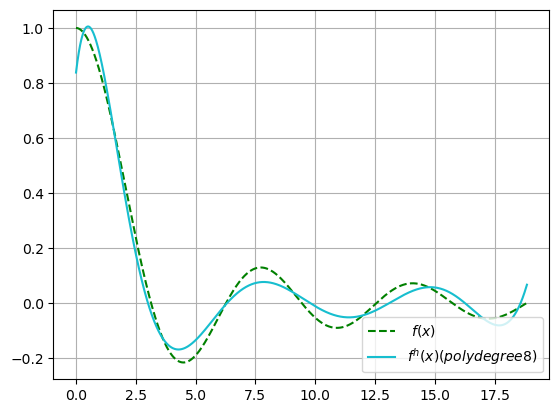

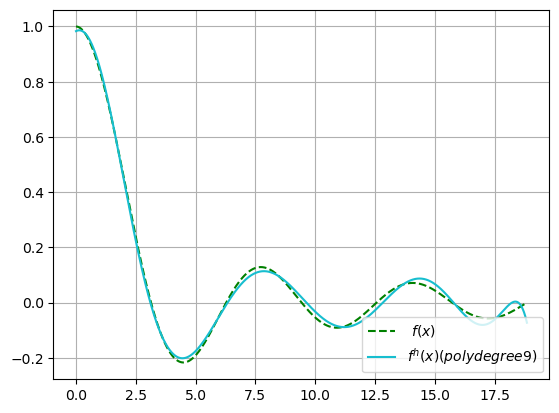

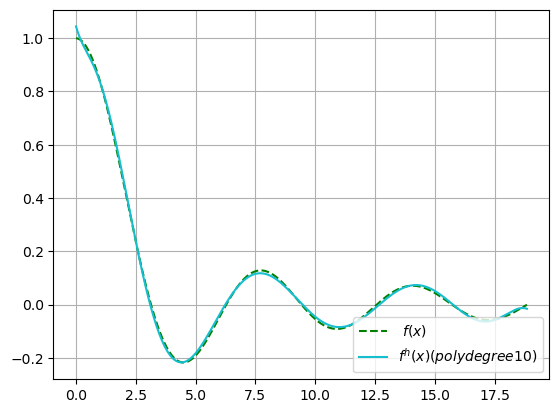

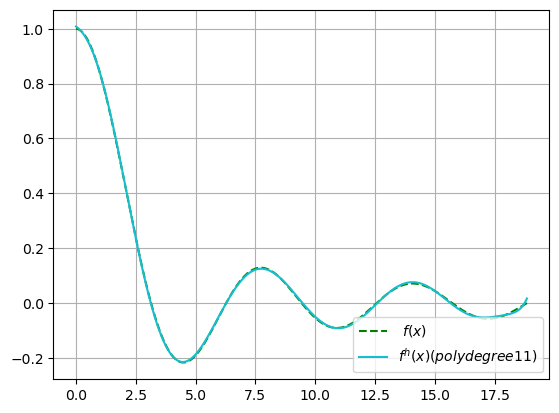

In [7]:
# Input n max. no. of dimension
for n in range(1,n_max+1,1):
    K = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            K[i][j], temp = integrate.quad(K_ij_term(i, j), lowerlim, upperlim)
            
    F_i_term = lambda i: lambda x: f(x)*x**i
            
    # Evaluate F vector
    F = np.zeros((n, 1))
    error = np.zeros((n, 1))

    for i in range(n):
        F[i], error[i] = integrate.quad(F_i_term(i), lowerlim, upperlim)
            
    coefficient_vector = np.linalg.solve(K, F)
    fh_approx_coefficients = list(reversed(coefficient_vector.flatten().tolist()))
            
    # coefficient_vector.flatten()
    fh_approx = np.poly1d(fh_approx_coefficients)
    # Plot f(x) and f^h(x)
    x = np.arange(lowerlim, upperlim,0.01)   # start,stop,step
    f_plot = f(x)
    fh_plot = fh_approx(x)
    color = cm.tab10(n)
    plt.plot(x, f_plot, '--g')
    plt.plot(x, fh_plot, color = color)
    plt.legend([" $f(x)$", f"$f^h(x)(poly degree {n-1})$"], loc ="lower right")
    plt.grid()
    plt.show()